In [ ]:
cd Documents/python/

# Problem definition: Movie recommendation system


The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

In this kernel we'll be building a baseline Movie Recommendation System using TMDB 5000 Movie Dataset. For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with.

There are basically three types of recommender systems:-
•	Demographic Filtering- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
•	Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
•	Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.
There are basically three types of recommender systems:-
•	Demographic Filtering- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
•	Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
•	Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.



In [2]:
import pandas as pd
import numpy as np
m=pd.read_csv('tmdb_5000_movies.csv')
c=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
m.shape

(4803, 20)

In [4]:
m.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
m.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
c.shape

(4803, 4)

In [7]:
c.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [8]:
c.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

# Visualization of data:

In [9]:
# extract no. of movies released per year
m['release_date']=pd.to_datetime(m['release_date'], errors='coerce')
m['year']=m['release_date'].dt.year

Horizontal bar graph representing number of movies released per year

In [10]:
import matplotlib.pyplot as plt
m.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

<Figure size 1500x1600 with 1 Axes>

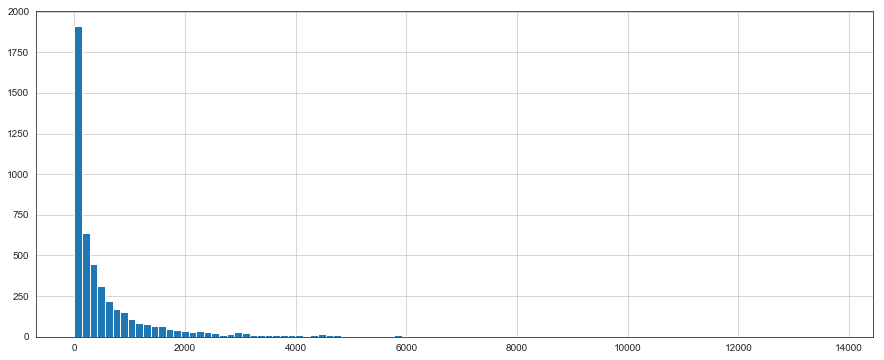

In [11]:
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.figure(figsize=(15,6))
m['vote_count'].hist(bins=100)

The above histogram represents - the vote counts of movies lying between 0-99 are very huge in no. compared 
to other vote counts interval and frequency of higher class vote counts intervals decreases gradually

([<matplotlib.axis.XTick at 0x1b4e2295a90>,
 <a list of 11 Text xticklabel objects>)

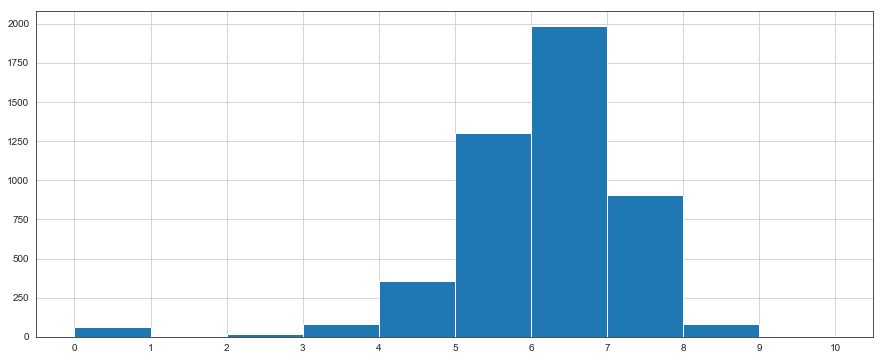

In [12]:
plt.figure(figsize=(15,6))
m['vote_average'].hist()
plt.xticks(range(0,11,1))

The above histogram represents - the frequency of average votes of movies lying between 6-6.9 is very huge compared 
to other average votes interval.

<Figure size 288x576 with 0 Axes>

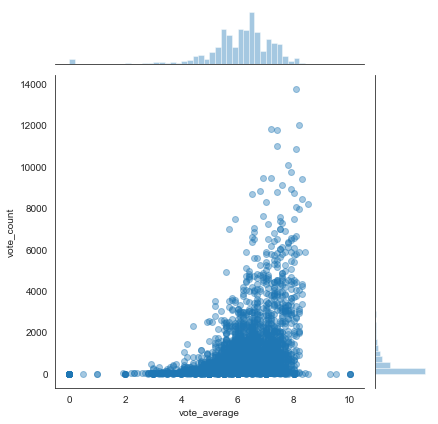

In [13]:
plt.figure(figsize=(4,8))
sns.jointplot(x='vote_average', y='vote_count',data=m,alpha=0.4)

The above joint plot shows the correlation between avarage vote and vote count. The more data weightage 
is at 6-7 range along x axis and at 0-3000 along y axis

In [14]:
c=c.rename(index=str, columns={'movie_id': 'id'})
mer=m.merge(c, on ='id')
mer.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,year,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# Preprocessing of data:

In [15]:
mer=mer.drop(columns=['runtime','revenue','homepage','title_x','title_y','status','production_companies','spoken_languages','production_countries','keywords'])
mer.head(1)

,budget,genres,id,original_language,original_title,overview,popularity,release_date,tagline,vote_average,vote_count,year,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Enter the World of Pandora.,7.2,11800,2009.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [16]:
mer['genres'].dtypes

dtype('O')

In [17]:
import ast
mer['genres']=mer['genres'].map(lambda x: ast.literal_eval(x))
mer['cast']=mer['cast'].map(lambda x: ast.literal_eval(x))
mer['crew']=mer['crew'].map(lambda x: ast.literal_eval(x))

In [18]:
def genreslist(x):
    gen=[]
    st=" "
    for i in x:
        if i.get('name')=='Science Fiction':
            scifi='Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen==[]:
        return np.nan
    else:
        return (st.join(gen))

In [19]:
mer['genres_list']=mer['genres'].map(lambda x: genreslist(x))

In [20]:
mer['genres_list']

0        Action Adventure Fantasy Sci-Fi
1               Adventure Fantasy Action
2                 Action Adventure Crime
3            Action Crime Drama Thriller
4                Action Adventure Sci-Fi
5               Fantasy Action Adventure
6                       Animation Family
7                Action Adventure Sci-Fi
8               Adventure Fantasy Family
9               Action Adventure Fantasy
10       Adventure Fantasy Action Sci-Fi
11       Adventure Action Thriller Crime
12              Adventure Fantasy Action
13              Action Adventure Western
14       Action Adventure Fantasy Sci-Fi
15              Adventure Family Fantasy
16               Sci-Fi Action Adventure
17              Adventure Action Fantasy
18                  Action Comedy Sci-Fi
19              Action Adventure Fantasy
20              Action Adventure Fantasy
21                      Action Adventure
22                     Adventure Fantasy
23                     Adventure Fantasy
24              

In [21]:
def act1(x):
    casts=[]
    for i in x:
        casts.append(i.get('name'))
    if casts==[]:
        return np.NaN
    else:
        return (casts[0])

In [22]:
mer['actor1']=mer['cast'].map(lambda x: act1(x))

In [23]:
def act2(x):
    casts=[]
    for i in x:
        casts.append(i.get('name'))
    if casts==[] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [24]:
mer['actor2']=mer['cast'].map(lambda x: act2(x))

In [25]:
def act3(x):
    casts=[]
    for i in x:
        casts.append(i.get('name'))
    if casts==[] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [26]:
mer['actor3']=mer['cast'].map(lambda x: act3(x))

In [27]:
def dire(x):
    dt=[]
    st=" "
    for i in x:
        if i.get('job')=='Director':
            dt.append(i.get('name'))
    if dt==[]:
        return np.NaN
    else:
        return (st.join(dt))

In [28]:
mer['director']=mer['crew'].map(lambda x: dire(x))
mer.head(1)

,budget,genres,id,original_language,original_title,overview,popularity,release_date,tagline,vote_average,vote_count,year,cast,crew,genres_list,actor1,actor2,actor3,director
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Enter the World of Pandora.,7.2,11800,2009.0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Action Adventure Fantasy Sci-Fi,Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron


In [29]:
mer['comb']=mer['actor1']+' '+mer['actor2']+' '+mer['actor3']+' '+mer['director']

In [30]:
mer=mer.drop(columns=['genres','budget','tagline','cast','crew','year','vote_count'])
mer.head(1)

,id,original_language,original_title,overview,popularity,release_date,vote_average,genres_list,actor1,actor2,actor3,director,comb
0,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,7.2,Action Adventure Fantasy Sci-Fi,Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron,Sam Worthington Zoe Saldana Sigourney Weaver J...


CONTENT BASED RECOMENDATION SYSTEM

Now lets make a recomendations based on the movie's plot summaries given in the overview column. so if our user gives movie 
title, our goal is to recommend movies that share similar plot summaries

In [31]:
# NLP(natural language processing) Tfidf technique
from sklearn.feature_extraction.text import TfidfVectorizer

tfv=TfidfVectorizer(min_df=3, max_features=None,
                   strip_accents='unicode', analyzer='word', token_pattern='\w{1,}',
                   ngram_range=(1,3),
                   stop_words='english')

#filling nan with empty sting
mer['overview']=mer['overview'].fillna('')

In [32]:
#fitting the tf-idf on the overview text
tfv_mat=tfv.fit_transform(mer['overview'])

In [33]:
tfv_mat

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

In [35]:
tfv_mat.shape

(4803, 10417)

In [36]:
from sklearn.metrics.pairwise import sigmoid_kernel

# compute the sigmoid kernel
sig=sigmoid_kernel(tfv_mat, tfv_mat)

In [39]:
# reverse mapping of indices and movies
indices=pd.Series(mer.index, index=mer['original_title']).drop_duplicates()

In [38]:
indices

original_title
Avatar                                            0
Pirates of the Caribbean: At World's End          1
Spectre                                           2
The Dark Knight Rises                             3
John Carter                                       4
Spider-Man 3                                      5
Tangled                                           6
Avengers: Age of Ultron                           7
Harry Potter and the Half-Blood Prince            8
Batman v Superman: Dawn of Justice                9
Superman Returns                                 10
Quantum of Solace                                11
Pirates of the Caribbean: Dead Man's Chest       12
The Lone Ranger                                  13
Man of Steel                                     14
The Chronicles of Narnia: Prince Caspian         15
The Avengers                                     16
Pirates of the Caribbean: On Stranger Tides      17
Men in Black 3                                   

In [40]:
indices['Newlyweds']

4799

In [41]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478])

In [42]:
# assigning relation values with their corresponding movie index 
list(enumerate(sig[indices['Newlyweds']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615943791623508),
 (3, 0.7615945564232902),
 (4, 0.7615945779342557),
 (5, 0.7615943267971559),
 (6, 0.7615948190414071),
 (7, 0.761594346971664),
 (8, 0.7615943903358867),
 (9, 0.761594688255891),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615943548130525),
 (17, 0.761594965420998),
 (18, 0.7615942819944953),
 (19, 0.7615945082445131),
 (20, 0.7615942928381602),
 (21, 0.7615949832832596),
 (22, 0.7615941559557649),
 (23, 0.761594428370306),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615944537585687),
 (28, 0.7615941559557649),
 (29, 0.7615943053510925),
 (30, 0.7615943361754078),
 (31, 0.76159445046522),
 (32, 0.7615941559557649),
 (33, 0.7615944286938301),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761594394

In [44]:
# arranging values in descending order
sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x:x[1], reverse=True)

[(4799, 0.7616344692549826),
 (616, 0.7616048159533783),
 (2689, 0.7616040118828756),
 (869, 0.7616023446645636),
 (3969, 0.7615999241031715),
 (1576, 0.761599897054374),
 (2290, 0.7615997916001525),
 (1032, 0.7615997293504287),
 (3145, 0.7615995818321376),
 (2531, 0.7615992277356394),
 (504, 0.7615991572658853),
 (866, 0.7615986885689172),
 (1157, 0.7615985018709569),
 (2962, 0.7615983449381306),
 (242, 0.7615982589231823),
 (4576, 0.7615982161834332),
 (1223, 0.761598205140339),
 (3479, 0.7615982040456053),
 (2586, 0.7615979971714508),
 (2688, 0.7615979281286247),
 (3155, 0.7615979184287898),
 (2869, 0.7615978888434758),
 (3559, 0.7615978829960376),
 (4641, 0.7615978736478359),
 (1632, 0.7615977959513464),
 (4616, 0.7615977247067919),
 (1071, 0.7615977198249168),
 (3393, 0.7615976461979505),
 (1970, 0.7615974163030651),
 (1856, 0.7615973809810894),
 (1385, 0.7615973007946546),
 (3583, 0.7615972678262316),
 (4591, 0.7615971603170043),
 (1110, 0.761597151119841),
 (237, 0.7615970790866

In [45]:
def rec(title, sis=sig):
    from fuzzywuzzy import process
    ind=process.extractOne(title,mer['original_title'])[2]
    print('selected movie :\n',mer[['original_title','genres_list','vote_average']].iloc[ind],'\n','index :',ind)
    print('\nsearching for recommendations..........\n')
    
    #get the index corresponding to original title
    idx= ind
    
    #get pairwise similarity score
    sig_s=list(enumerate(sig[idx]))
    
    #sort the movie
    sig_s=sorted(sig_s, key=lambda x: x[1], reverse=True)
    
    #scores of 10 most similar movies
    sig_s=sig_s[1:11]
    
    # movie indices
    mi=[i[0] for i in sig_s]
    
    # top 10 similar movies
    return mer[['original_title','genres_list','vote_average']].iloc[mi]

In [50]:
rec('avatar')

selected movie :
 original_title                             Avatar
genres_list       Action Adventure Fantasy Sci-Fi
vote_average                                  7.2
Name: 0, dtype: object 
 index : 0

searching for recommendations..........



,original_title,genres_list,vote_average
1341,Obitaemyy Ostrov,Action Fantasy Sci-Fi Thriller,5.3
634,The Matrix,Action Sci-Fi,7.9
3604,Apollo 18,Horror Thriller Sci-Fi,5.0
2130,The American,Crime Drama Thriller,5.8
775,Supernova,Horror Sci-Fi Thriller,4.9
529,Tears of the Sun,Action Drama War,6.4
151,Beowulf,Adventure Action Animation,5.5
311,The Adventures of Pluto Nash,Action Comedy Sci-Fi,4.4
847,Semi-Pro,Comedy,5.4
942,The Book of Life,Romance Animation Adventure Comedy Family Fantasy,7.3
